# PREPROCESSING


In [1]:
#Import libs
import pickle
import nltk
nltk.download('punkt')

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
!pip install pyspark

In [0]:
with open('speeches.pkl', 'rb') as file:
    data = pickle.load(file)

In [0]:
#data

# 6A and 6B


Using NLTK's Punkt sentence tokenizer, we are using their "pretrained unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences." This satisfies the nature of the part (a) 

In [0]:
'''Helper functions along with the transform() function which returns a list of 
tuples sorted by year. Each tuple contains the SOU year, Sentence Count, and 
Mean Sentence Length'''

'''sentencing_data() returns a list of sentences for a given body of text. 
Iterating through each row in the original data file, we produce a list of 
sentences for each SOU'''

def sentencing_data(str):
  d = str.replace('\r\n\r\n', ' ') #cleans str
  sent_list = nltk.tokenize.sent_tokenize(d)
  return sent_list

def SentLen(str):
    spl = str.split(' ')  #finding the number of words using split()
    return len(spl)
  
def avgSentLen(list):
    sum = 0
    for i in range(0, len(list)):
      sum += SentLen(list[i])
    return sum/len(list)

def totalWords(list):
  sum = 0
  for i in range(0, len(list)):
    sum += SentLen(list[i])
  return sum

def transform(data):
    tup_List = []
    for i in range(0, len(data)):
        sentData = sentencing_data(data[i][1])
        year = int(data[i][2])
        numSent = len(sentData)
        pres = data[i][0] #find name of President
        tup_List.append((year, pres, numSent, round(avgSentLen(sentData),2), totalWords(sentData)))

    return sorted(tup_List, key=lambda tup: tup[0])

In [6]:
a = transform(data)
print(a)


[(1790, 'George Washington', 40, 35.25, 1410), (1791, 'George Washington', 60, 38.58, 2315), (1792, 'George Washington', 61, 34.52, 2106), (1793, 'George Washington', 55, 35.91, 1975), (1794, 'George Washington', 80, 36.55, 2924), (1795, 'George Washington', 53, 37.64, 1995), (1796, 'George Washington', 78, 36.88, 2877), (1797, 'John Adams', 59, 35.19, 2076), (1798, 'John Adams', 55, 40.49, 2227), (1799, 'John Adams', 36, 42.06, 1514), (1800, 'John Adams', 40, 34.38, 1375), (1801, 'Thomas Jefferson', 92, 35.1, 3229), (1802, 'Thomas Jefferson', 62, 35.66, 2211), (1803, 'Thomas Jefferson', 48, 47.77, 2293), (1804, 'Thomas Jefferson', 50, 42.02, 2101), (1805, 'Thomas Jefferson', 78, 37.59, 2932), (1806, 'Thomas Jefferson', 73, 39.26, 2866), (1807, 'Thomas Jefferson', 62, 38.55, 2390), (1808, 'Thomas Jefferson', 72, 37.22, 2680), (1809, 'James Madison', 41, 44.71, 1833), (1810, 'James Madison', 62, 39.48, 2448), (1811, 'James Madison', 47, 48.4, 2275), (1812, 'James Madison', 88, 36.85, 32

In [7]:
#Decided to go the Pandas df route
df = pd.DataFrame(a, columns=['Year', 'President', 'Sentences Count', 'Avg Length', 'Total Words'])
print(df)

     Year           President  Sentences Count  Avg Length  Total Words
0    1790   George Washington               40       35.25         1410
1    1791   George Washington               60       38.58         2315
2    1792   George Washington               61       34.52         2106
3    1793   George Washington               55       35.91         1975
4    1794   George Washington               80       36.55         2924
5    1795   George Washington               53       37.64         1995
6    1796   George Washington               78       36.88         2877
7    1797          John Adams               59       35.19         2076
8    1798          John Adams               55       40.49         2227
9    1799          John Adams               36       42.06         1514
10   1800          John Adams               40       34.38         1375
11   1801    Thomas Jefferson               92       35.10         3229
12   1802    Thomas Jefferson               62       35.66      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


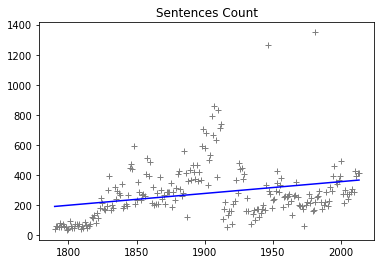

Slope:  0.7855   Intercept:  -1214.1051


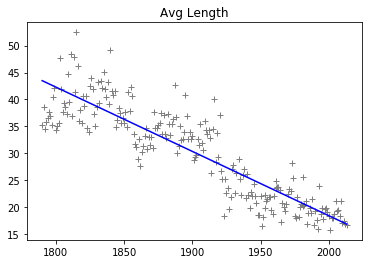

Slope:  -0.1192   Intercept:  256.9474


In [8]:
x = np.array(df['Year'])
Sent_Count= np.array(df['Sentences Count'])
avg_length= np.array(df['Avg Length'])


def rplot(X,Y,col):
    M = np.vstack([X,np.ones(len(X))]).T
    m, b = np.linalg.lstsq(M,Y)[0]
    
    plt.figure()
    plt.plot(X, Y,'+', c = '0.5')
    F = m*X+b
    plt.plot(X, F,'b', label = col)
    plt.title(col)
    
    plt.show()
    print('Slope: ',round(m,4) , '  Intercept: ', round(b,4)) # print slope and intercept below plot
    
rplot(x,Sent_Count,"Sentences Count")
rplot(x,avg_length,"Avg Length")
    

From the plots, we observe that the number of sentences in SOU addresses have increased over time (m = .7855). In addition, the average sentence length has decreased over time (m = -.1192). An intuitive explanation for this trend is that Presidents (and their speech-writers) have incorporated brevity into the speeches as the years have gone by. Instead of possibly having many run-on sentences that have more than 30 words, we see many presidents after 1950 havng a mean sentence length under 25 words. 

# **6C**

In [0]:
df1 = df[:123]
df2 = df[123:]


In [0]:
yr_pre1912 = np.array(df1['Year'])
tw_pre1912 = np.array(df1['Total Words'])

yr_post1912 = np.array(df2['Year'])
tw_post1912 = np.array(df2['Total Words'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


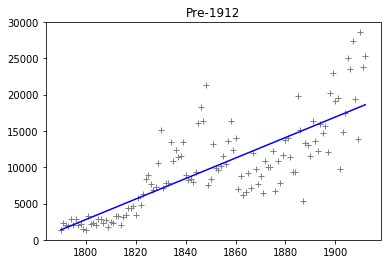

Slope:  141.0685   Intercept:  -251119.8181


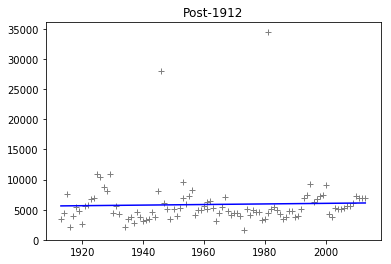

Slope:  4.8585   Intercept:  -3648.557


In [11]:
rplot(yr_pre1912, tw_pre1912,"Pre-1912")
rplot(yr_post1912, tw_post1912,"Post-1912")
    

Prior to 1912, we see an increase in total words (i.e. an increase of 141 words per unit increase in year via our regression).

After 1912, we see no significant change in increase of total words.

In 1913, Woodrow Wilson brought back in-person delivery. Due to time constraints and speech-writers' preferences, this may explain the lack of substantial increase in words.

(Source: https://history.house.gov/Institution/SOTU/List/)

# 6D

To find which President has the longest sentences on average, we must consider every SOU that the President delivered. Thus, we will use a dictionary to store the *total average sentence length* , i.e. the aggregate total words divided by the aggregate number of sentences

In [12]:
d = {}

for i in df['President'].unique():
    totSent = 0
    totWords = 0
    for j in df[df['President']==i].index:
        totWords += df['Total Words'][j]
        totSent += df['Sentences Count'][j]
    totavgSent = round((totWords/totSent), 2)
    d[i] = totavgSent

d

{'Abraham Lincoln': 30.15,
 'Andrew Jackson': 40.72,
 'Andrew Johnson': 32.63,
 'Barack Obama': 17.64,
 'Benjamin Harrison': 32.33,
 'Calvin Coolidge': 21.78,
 'Chester A. Arthur': 34.56,
 'Dwight D. Eisenhower': 21.14,
 'Franklin D. Roosevelt': 23.7,
 'Franklin Pierce': 40.49,
 'George Bush': 17.13,
 'George W. Bush': 18.56,
 'George Washington': 36.54,
 'Gerald R. Ford': 19.33,
 'Grover Cleveland': 36.26,
 'Harry S Truman': 20.73,
 'Herbert Hoover': 25.94,
 'James Buchanan': 31.29,
 'James K. Polk': 36.89,
 'James Madison': 44.26,
 'James Monroe': 36.67,
 'Jimmy Carter': 23.7,
 'John Adams': 37.85,
 'John F. Kennedy': 24.13,
 'John Quincy Adams': 41.39,
 'John Tyler': 39.35,
 'Lyndon B. Johnson': 19.92,
 'Martin Van Buren': 42.17,
 'Millard Fillmore': 36.25,
 'Richard M. Nixon': 23.97,
 'Ronald Reagan': 19.69,
 'Rutherford B. Hayes': 35.39,
 'Theodore Roosevelt': 31.42,
 'Thomas Jefferson': 38.55,
 'Ulysses S. Grant': 34.31,
 'Warren G. Harding': 25.98,
 'William Howard Taft': 34.38,

In [13]:
max_pres = max(d, key=d.get)
min_pres = min(d, key=d.get)

print("The President with the longest sentences on average:   ", max_pres)
print("The President with the shortest sentences on average:   ", min_pres)

The President with the longest sentences on average:    James Madison
The President with the shortest sentences on average:    George Bush


In [14]:
#converts dict into list of lists, sorted by avg sent length

temp = []
dlist = []
for key, value in d.items():
    temp = [key,value]
    dlist.append(temp)

from operator import itemgetter
final = sorted(dlist, key=itemgetter(1))
final



[['George Bush', 17.13],
 ['Barack Obama', 17.64],
 ['George W. Bush', 18.56],
 ['Gerald R. Ford', 19.33],
 ['William J. Clinton', 19.57],
 ['Ronald Reagan', 19.69],
 ['Lyndon B. Johnson', 19.92],
 ['Harry S Truman', 20.73],
 ['Dwight D. Eisenhower', 21.14],
 ['Calvin Coolidge', 21.78],
 ['Franklin D. Roosevelt', 23.7],
 ['Jimmy Carter', 23.7],
 ['Richard M. Nixon', 23.97],
 ['John F. Kennedy', 24.13],
 ['Herbert Hoover', 25.94],
 ['Warren G. Harding', 25.98],
 ['Abraham Lincoln', 30.15],
 ['James Buchanan', 31.29],
 ['Theodore Roosevelt', 31.42],
 ['Woodrow Wilson', 31.84],
 ['Benjamin Harrison', 32.33],
 ['Andrew Johnson', 32.63],
 ['William McKinley', 33.17],
 ['Ulysses S. Grant', 34.31],
 ['William Howard Taft', 34.38],
 ['Chester A. Arthur', 34.56],
 ['Rutherford B. Hayes', 35.39],
 ['Millard Fillmore', 36.25],
 ['Grover Cleveland', 36.26],
 ['George Washington', 36.54],
 ['Zachary Taylor', 36.64],
 ['James Monroe', 36.67],
 ['James K. Polk', 36.89],
 ['John Adams', 37.85],
 ['Tho

In [15]:
import math
#25th percentile

print("The median president is:  ", final[20][0])
q1 = math.ceil(.25 * len(final))
q2 = math.ceil(.75 * len(final))
print("The 25th percentile is:  ", final[q1-1][0])
print("The 75th percentile is:  ", final[q2-1][0])

The median president is:   Benjamin Harrison
The 25th percentile is:   Franklin D. Roosevelt
The 75th percentile is:   Zachary Taylor


**Median**: Benjamin Harrison

The 25th percentile is:   Franklin D. Roosevelt

The 75th percentile is:   Zachary Taylor


In [16]:
# sentencing_data defined above in cell with all functions
#intialize 
max_sent = 44  # based off longest avg sent length from Madison
min_sent = 15
smin = ''
smax = ''
for i in range(0, len(data)):
    sentData = sentencing_data(data[i][1])
    for j in range(0, len(sentData)):
        if SentLen(sentData[j]) < min_sent and SentLen(sentData[j]) > 2 :   #We set this as 2 because there are many names with abbreviations which count as sentences
            min_sent = SentLen(sentData[j])
            smin = sentData[j]
        if SentLen(sentData[j]) > max_sent:
            max_sent = SentLen(sentData[j])
            smax = sentData[j]


print('The longest sentence:   ',smax)

print('The shortest sentence:  ', smin)

                

The longest sentence:    It shows that the ordinary revenues from all sources for the fiscal year ended June 30, 1883, amounted to $398,287,581.95, whereof there was received--          From customs    $214,706,496.93        From internal revenue    144,720,368.98        From sales of public lands    7,955,864.42        From tax on circulation and deposits of national banks    9,111,008.85        From profits on coinage, bullion deposits, and assays    4,460,205.17        From other sources    17,333,637.60          Total        398,287,581.95             For the same period the ordinary expenditures were:          For civil expenses    $22,343,285.76        For foreign intercourse    2,419,275.24        For Indians    7,362,590.34        For Pensions    66,012,573.64        For the military establishment, including river and harbor  improvements and arsenals    48,911,382.93        For the naval establishment, including vessels, machinery,  and improvements at navy-yards    15,283,437

In [0]:
def clean_and_split(s):
  # encode to UTF-8, convert to lowercase and translate all hyphens and
  # punctuation to whitespace
  s = s.encode('utf-8').lower().replace('-',' ').translate(None, string.punctuation)
  # replace \r\n
  s = re.sub('(\r\n)+',' ', s)
  # replace whitespace substrings with one whitespace and remove
  # leading/trailing whitespaces
  s = re.sub(' +',' ',s.strip())
  return s.split(' ')
